# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 5

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

-----

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


### Задача 1.

**1.** Найдите оценку параметра $\theta$ методом максимального правдоподобия по выборке размера $n$ из распределения $\mathcal{N}(a,\sigma^2)$ для трех различных случаев
- $\theta = (a, \sigma^2)$;
- $\theta = \sigma^2$, причем $a$ известно;
- $\theta = a$, причем $\sigma^2$ известно.

Для последнего случая посчитайте асимптотическую дисперсию оценки по теореме из лекции.

**2.** Найдите оценку параметра $\theta$ методом максимального правдоподобия по выборке размера $n$ из распределения $\mathrm{Pois}(\theta)$. Посчитайте асимптотическую дисперсию по теореме из лекции, если оценка является асимптотически нормальной.

---
### Задача 2.
Пусть $X_1,...,X_n$ &mdash;  выборка из категориального распределения, то есть $\mathsf{P}_\theta(X_1 = j) = \theta_j$ для $j \in \{1, ..., k\}$, причем $\theta = (\theta_1, ..., \theta_k), \theta_j \geqslant 0$ и $\theta_1 + ... + \theta_k = 1$. Найдите оценку максимального правдоподобия параметра $\theta$ и проверьте ее на состоятельность.

---
### Задача 3.


**Профиль Физика**

Скачайте <a target="_blank" href="https://www.kaggle.com/datasets/fedesoriano/cern-electron-collision-data">данные</a> столкновениях частиц и оставьте следующие признаки:
* `E1`, `E2` &mdash; полная энергия электронов (ГэВ);
* `M` &mdash; инвариантная масса двух электронов (ГэВ).

**Профиль Биология**

Скачайте <a target="_blank" href="https://www.kaggle.com/datasets/ruslankl/mice-protein-expression">данные</a> экспрессии белков у белых мышей и оставьте следующие белки для анализа:
* `ITSN1_N`
* `DYRK1A_N` 
* `ELK_N`

**Профиль Химия**

Выберите любой вариант выше.

---


**1.** Постройте для каждого из признаков гистограммы. Что можно сказать о характере распределения?


In [ ]:
data = pd.read_csv('Data_Cortex_Nuclear.csv')
data = data[['ITSN1_N', 'DYRK1A_N', 'ELK_N']]
data.head()


,ITSN1_N,DYRK1A_N,ELK_N
0,0.747193,0.503644,1.866358
1,0.689064,0.514617,1.761047
2,0.730247,0.509183,1.765544
3,0.617076,0.442107,1.286277
4,0.617430,0.434940,1.324695


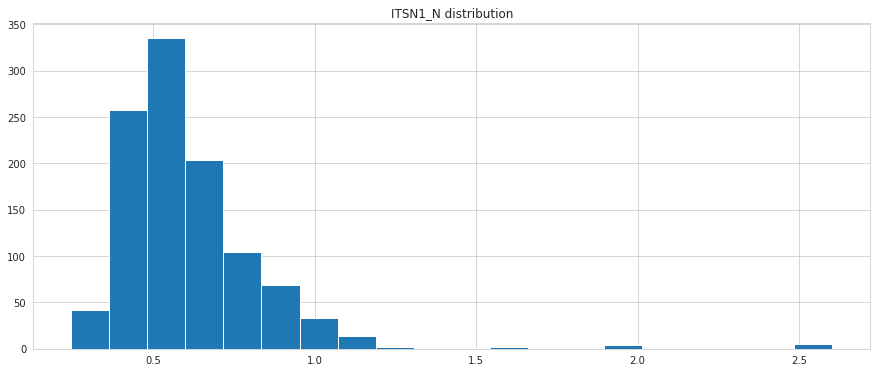

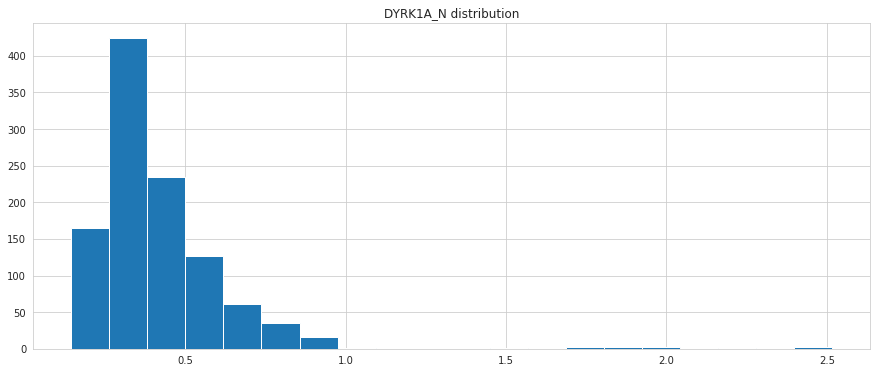

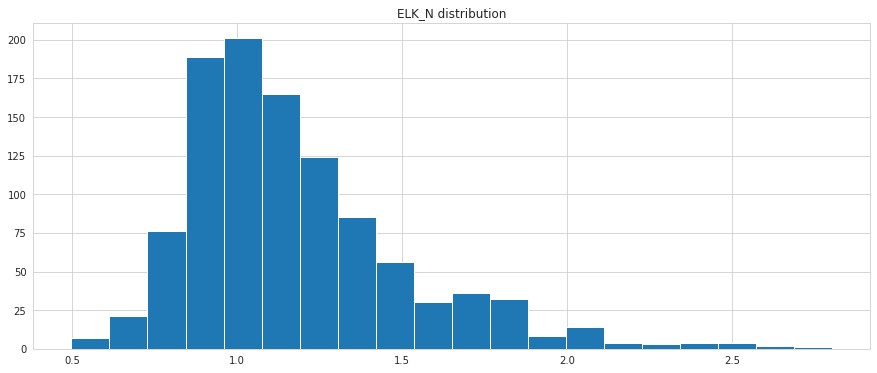

In [ ]:
columns = ['ITSN1_N', 'DYRK1A_N', 'ELK_N']
for i, column in enumerate(columns):
    plt.figure(figsize=(15, 6))

    plt.hist(data[column], bins=20)
    plt.title(column + ' distribution')

**Ответ:**
Используя только гистограмму, сложно точно оценить характер распределения. Но все три распределения выглядят похожими на колокол, поэтому, скорее всего, это нормальное распределение во всех трех случаях.



Также на графиках видны выбросы, которые тоже снижают информативность графиков.


**2.** Пусть есть выборка $X_1, ..., X_n$. Опишите процедуру бутстрепа построения доверительного интервала для величины $\theta = \mathsf{E} X_1$. Рассмотрите три типа  бутстрепных доверительных интервалов, выпишите формулу для каждого из них.

**Описание:**

Процедура бутстрепа для построения доверительного интервала для величины $\theta = \mathsf{E} X_1$ состоит из следующих шагов:

1.Сформировать выборку с возвращением из исходной выборки размера $n$. Размер бутстрепной выборки **всегда тот же**, что и у исходной. 

2.Процедуру генерации нужно выполнить $B$ раз (многократно).


3.Для каждой бутстреп-выборки вычислить значение статистики $\hat{\theta}^*_b$ ($b$ обозначает номер бутстреп-выборки). Получаем выборку значений $\hat{\theta}^*_1$, $\hat{\theta}^*_2$, ... , $\hat{\theta}^*_b$


4. Затем полученную выборку использовать для аппроксимации значения оценки (бустпрепной оценки). Для построения доверительных интервалов нам нужна бустрепная оценка дисперсии(выборочная дисперсия): 


$$\hat{v}^*_{boot}= {\frac{1}{B} \sum_{i=1}^{B}(\hat{\theta}^{*}_i)^2}-({\frac{1}{B} \sum_{i=1}^{B}\hat{\theta}^{*}_i})^2$$


**Бустрепные ДИ:**

1. **Нормальный интервал**.  Он основан на предположении, что выборочное среднее имеет нормальное распределение. Нормальный бутстрепный интервал для уровня доверия $1 + \alpha$ имеет вид:
$$\left(\hat{\theta} - z_{(1+\alpha)/2} \sqrt{\hat{v}_{\text{boot}}} , \hat{\theta} + z_{(1+\alpha)/2} \sqrt{\hat{v}_{\text{boot}}}\right)$$,
$\hat{\theta}$ - выборочное среднее, $\sqrt{\hat{v}_{\text{boot}}}$ - бустрепная оценка дисперсии\, $z_{1+\alpha/2}$-квантиль стандартного нормального распределения.

2. **Центральный интервал**
$$\left(2\hat{\theta} - \hat{\theta}^{*}_{\lceil B({(1+\alpha)/2})  \rceil}, 2\hat{\theta} - \hat{\theta}^{*}_{\lfloor B({(1-\alpha)/2})  \rfloor}\right)$$

где $\hat{\theta}$ - оценка параметра на исходной выборке,
 
$\hat{\theta}^{*}_1$, ..., $\hat{\theta}^{*}_B$ - оценки по бутстрепным выборкам

3. **Квантильный интервал**
$$\left(\hat{\theta}^{*}_{\lfloor B({(1-\alpha)/2})  \rfloor}, \hat{\theta}^{*}_{\lceil B({(1+\alpha)/2})  \rceil}\right)$$

где $\hat{\theta}$ - некоторая оценка ${\theta}$, в нашем случаем мат.ож,
 
$\hat{\theta}^{*}_1$, ..., $\hat{\theta}^{*}_B$ - оценки по бутстрепным выборкам

**3.** Реализуйте функцию вычисления выборки оценок $\theta^*_1, \ldots \theta^*_B$ для оценки $\widehat \theta$ методом бутстрепа. Функция должна принимать на вход выборку и количество бутстрепных выборок $B$. 

In [ ]:
def estimator(sample):
    '''
    Делает необходимые преобразования с выборкой (выполняет подсчет статистики).
    Используется в функции bootstrap для вычисления оценок.
    
    :param sample: массив с числами
    :return: оценка, посчитанная по выборке
    '''
    
    return np.mean(sample)


def bootstrap(sample, B=100_000):
    '''
    Реализует процедуру бутстрепа.
    
    :param sample: исходная выборка, по которой будут вычисляться бутстрепные оценки
    :param B: число бутстрепных оценок
    :return: возвращает массив длины B c бутстрепными оценками
    '''

    n = len(sample.dropna())  # длина выборки
    bootstrap_estimations = np.zeros(B)
    for i in range(B):
      s = np.random.choice(sample, size=n, replace=True)# бутстрепная выборка
      bootstrap_estimations[i] = estimator(s)
    return bootstrap_estimations


**4.** Реализуйте три типа бутстрепных доверительных интервалы в виде функций, принимающих на вход выборку оценок, полученных с помощью бутстрепа. Реализовывать вычисление бутстрепных интервалов для подвыборок размера от 1 до n не нужно, только для всей выборки. 

In [ ]:
def boostrap_normal_confidence_interval(bootstrap_estimations, alpha=0.95):
    v_boot = np.var(bootstrap_estimations, ddof=1) 
    z = sps.norm.ppf(((1+ alpha)/2))
    mean = np.mean(bootstrap_estimations)
    left = mean - z * np.sqrt(v_boot)
    right = mean + z * np.sqrt(v_boot)
    return (left, right)
    
def boostrap_central_confidence_interval(bootstrap_estimations, alpha=0.95):
    mean = np.mean(bootstrap_estimations)
    B_l = int(np.ceil((1 + alpha) / 2 * len(bootstrap_estimations)))
    B_r = int(np.floor((1 - alpha) / 2 * len(bootstrap_estimations)))
    sorted_estimations = np.sort(bootstrap_estimations)
    theta_hat = np.mean(sorted_estimations)
    theta_star_l = sorted_estimations[B_l]
    theta_star_r = sorted_estimations[B_r]
    return (2 * theta_hat - theta_star_l, 2 * theta_hat - theta_star_r)
    
def boostrap_quantile_confidence_interval(bootstrap_estimations, alpha=0.95):
    B_r = int(np.ceil((1 + alpha) / 2 * len(bootstrap_estimations)))
    B_l = int(np.floor((1 - alpha) / 2 * len(bootstrap_estimations)))
    sorted_estimations = np.sort(bootstrap_estimations)
    theta_star_r = sorted_estimations[B_r]
    theta_star_l = sorted_estimations[B_l]
    return (theta_star_l, theta_star_r)

**5.** Для каждого признака постройте бутстрепные доверительные интервалы для $\theta = \mathsf{E} X_1$ и сравните их.

Построим для белка ITSN1_N

In [ ]:

estimations = bootstrap(data['ITSN1_N'].dropna(), B=100_000)
normal_interval = boostrap_normal_confidence_interval(estimations)
central_interval = boostrap_central_confidence_interval(estimations)
quantile_interval = boostrap_quantile_confidence_interval(estimations)
normal_interval, central_interval, quantile_interval

((0.6021012702357139, 0.632141149334711),
 (0.6016907693178716, 0.6317909387384844),
 (0.6024514808319406, 0.6325516502525533))

Построим для белка DYRK1A_N

In [ ]:
estimations = bootstrap(data['DYRK1A_N'].dropna(), B=100_000)
normal_interval = boostrap_normal_confidence_interval(estimations)
central_interval = boostrap_central_confidence_interval(estimations)
quantile_interval = boostrap_quantile_confidence_interval(estimations)
normal_interval, central_interval, quantile_interval



((0.41091697045860925, 0.440609270210963),
 (0.4104688818562018, 0.440072127167251),
 (0.41145411350232125, 0.4410573588133705))

Построим для белка 'ELK_N'

In [ ]:
estimations = bootstrap(data['ELK_N'].dropna(), B=100_000)
normal_interval = boostrap_normal_confidence_interval(estimations)
central_interval = boostrap_central_confidence_interval(estimations)
quantile_interval = boostrap_quantile_confidence_interval(estimations)
normal_interval, central_interval, quantile_interval



((1.1532279922318087, 1.193597761671635),
 (1.1530552799448748, 1.1934294322358352),
 (1.1533963216676084, 1.1937704739585688))